# Part III - Dogs VS Cats 
#####  @ Haim Goldfisher

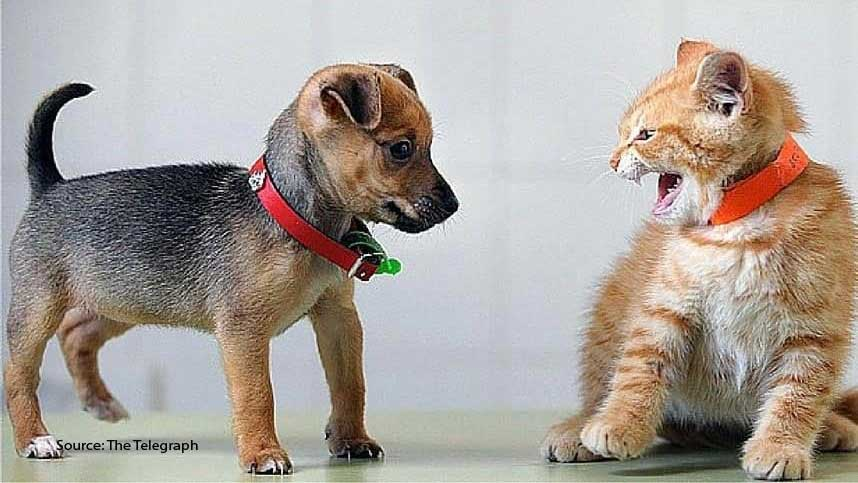

In [12]:
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.image import imread

#import warnings & offline
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as pyo

import numpy as np # linear algebra
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Data Preprocessing:

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# A model that I learned by myself: CatBoost + Plotly

from catboost import CatBoostClassifier
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cross Validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# OpenCv
    
import cv2
from os import listdir
from os.path import isfile, join

##### Link to kaggle: https://www.kaggle.com/c/dogs-vs-cats

We would like to create an array which will contain our images:

##### Because the test folder has no labels, I created a test folder by myself by taking 1000 images of each type and putting them in a folder named 'test'.

In [13]:
main = "C:\Haim\Anaconda\Dogs_VS_Cats"
train = "train"
train = os.path.join(main,train)

test = "test"
test = os.path.join(main,test)

IMAGE_FOLDER_PATH="C:\Haim\Anaconda\Dogs_VS_Cats/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)

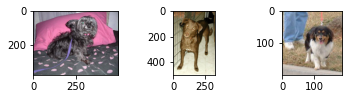

In [14]:
# here's an example of dogs pictures:
for i in range(3):
    plt.subplot(331+i)
    filename=train+'/dog.'+str(i)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()  

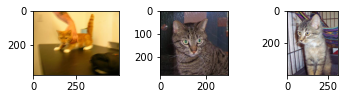

In [15]:
# here's an example of cats pictures:
for i in range(3):
    plt.subplot(331+i)
    filename = train+'/cat.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()   

We would like to make a pandas dataframe so we will be able to work with the data of each picture of our train folder

In [16]:
# create dataset
targets=list() # vector of the correct labels (dog or cat), our Y
data = np.ndarray((23000,6075), dtype=np.uint8) # 23000 images , 45^2*45^2 = 2025*3 pixels, our X size
for i, file_name in enumerate(FILE_NAMES): # each file name in our train folder 
    target = file_name.split(".")[0] # the name of each picture starts with dog or cat
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name) # folder path + the name of the picture
    img = cv2.imread(full_path) # read the photo into matrix of pixels (3D)
    resized_img = cv2.resize(img, (45,45)) # resize each picture into 64*64 pixels
    targets.append(target) # add the correct label of the picture (dog/cat)
    data[i, :] = resized_img.flatten() # add the matrix as a row vector into the correct row in our data array

##### Some important details before uploading the datasets:

* After a lot of trials and errors, this is the best option of dataset that I can think about. I tried to use gray scale's data set but the color has great impact on the model's performents, so I gave up on the idea of gray pictures. In this case, each pixel in each picture has RGB values (3), which multiply the amount of pixels by three. However, after dimensionality reduction by PCA, the number of features we take is much more lower.


* Due to https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/ we would like to create more data by flip our pictures. I wanted to understand the logic of Deep Learning methods which can bring 97% success so I find this article. I have to add that I tried a lot of options of rotatitons and transforms, but 'flip' provides the best results.

In [ ]:
# some of the method which I tried to use:
image = cv2.imread(os.path.join(IMAGE_FOLDER_PATH, "cat.0.jpg"))

In [17]:
# create dataset for flipped pictures
data_f = np.ndarray((23000,6075), dtype=np.uint8) # 23000 images , 45^2*45^2 = 2025*3 pixels, our X size
for i, file_name in enumerate(FILE_NAMES): # each file name in our train folder 
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name) # folder path + the name of the picture
    img = cv2.imread(full_path) # read the photo into matrix of pixels (3D)
    img = cv2.flip(img, 1)
    resized_img = cv2.resize(img, (45,45)) # resize each picture into 64*64 pixels
    data_f[i, :] = resized_img.flatten() # add the matrix as a row vector into the correct row in our data array

In [18]:
# we will convert out data array into pandas dataframe, each row present a picture, each column presents a spesific pixel
data = pd.DataFrame(data, columns= ["pixel"+ str(i+1)for i in range(data.shape[1])])
data_f = pd.DataFrame(data_f, columns= ["pixel"+ str(i+1)for i in range(data_f.shape[1])])
data = pd.concat([data, data_f], axis=0)

data.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0      93     170     209      99     177     220     106     184     227   
1      41      42      38      63      58      55      36      36      30   
2      52      44      37      58      48      41      64      54      47   
3     217     222     221     222     227     226     234     232     232   
4      70     107     135      60      97     125      42      81     108   

   pixel10  ...  pixel6066  pixel6067  pixel6068  pixel6069  pixel6070  \
0      113  ...          4          1          2          2          1   
1       48  ...         75         44         52         69         49   
2       67  ...        166         59        147        153          0   
3      225  ...        203        203        205        205        221   
4       73  ...         97         67         90        105         62   

   pixel6071  pixel6072  pixel6073  pixel6074  pixel6075  
0          2          2          1          2          2  
1         53         71         25         31         44  
2        180        182         10        187        189  
3        222        220        207        212        215  
4         93        104         65         89        101  

[5 rows x 6075 columns]

In [19]:
# we will convert out targets list into a pandas df so we will add it to the data df
labels = pd.DataFrame({"label":targets})
labels = pd.concat([labels, labels], axis=0) # double the size of labels
labels.sample(n = 4, random_state = 4).sort_values(by = 'label')

label
7782    cat
1560    cat
18868   dog
19503   dog

In [49]:
df = pd.concat([labels, data], axis=1)
df.reset_index(drop=True, inplace=True)
df.sample(n = 4, random_state = 4).sort_values(by = 'label')

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
7782    cat     108     102      64     105     102      63     110     104   
24560   cat     119     140     167     125     146     173     126     150   
18868   dog     111     112     126     104     105     118      99      94   
42503   dog      48      88      64     141     166     164      61      74   

       pixel9  ...  pixel6066  pixel6067  pixel6068  pixel6069  pixel6070  \
7782       67  ...        101        116        202        152        105   
24560     176  ...         15         18         20         20         28   
18868     103  ...        107        119        117        130        132   
42503      71  ...         75         74         81         98         46   

       pixel6071  pixel6072  pixel6073  pixel6074  pixel6075  
7782         169        127         79         83         82  
24560         28         28         23         23         23  
18868        140        158        115        120        137  
42503         54         66         77         86        100  

[4 rows x 6076 columns]

In [50]:
df.shape # 23000 pics + 23000 flipped pics, 6075 pixels and 1 label column

(46000, 6076)

In [23]:
# now we will create a df for out test

IMAGE_FOLDER_PATH="C:\Haim\Anaconda\Dogs_VS_Cats/test"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)

# create dataset
y_test = list() # vector of the correct labels (dog or cat)
data_test = np.ndarray((2000,6075), dtype=np.uint8) # 2000 , 45^2*45^2 = 2025*3 pixels, our X size
for i, file_name in enumerate(FILE_NAMES): # each file name in our train folder 
    target = file_name.split(".")[0] # the name of each picture starts with dog or cat
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name) # folder path + the name of the picture
    img = cv2.imread(full_path) # read the photo into matrix of pixels (3D)
    resized_img = cv2.resize(img, (45,45)) # resize each picture into 64*64 pixels
    y_test.append(target) # add the correct label of the picture (dog/cat)
    data_test[i, :] = resized_img.flatten() # add the matrix as a row vector into the correct row in our data array

y_test = pd.DataFrame({"label":y_test})    
X_test = pd.DataFrame(data_test, columns= ["pixel"+ str(i+1)for i in range(data.shape[1])])
X_test.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     204     199     198     204     199     198     208     200     200   
1     151     156     145     126     124     157      35      44      61   
2     163     175     181     160     172     178     161     173     179   
3      69      77      90      48      61      78      63      80      83   
4      97      91      56     102     101      61      86      92      74   

   pixel10  ...  pixel6066  pixel6067  pixel6068  pixel6069  pixel6070  \
0      229  ...        144         89         91         92         60   
1      128  ...         89         87         72         84         75   
2      166  ...        146        113        129        146        109   
3      112  ...        116         47         53         52         20   
4       84  ...        171        107        117        179        107   

   pixel6071  pixel6072  pixel6073  pixel6074  pixel6075  
0         68         42         49         52         30  
1         59         70         83         66         79  
2        124        140        105        120        136  
3         21         19         58         64         62  
4        112        174        112        114        179  

[5 rows x 6075 columns]

In [24]:
X_test.shape

(2000, 6075)

After we created our datasets, lets take a look at the pictures now

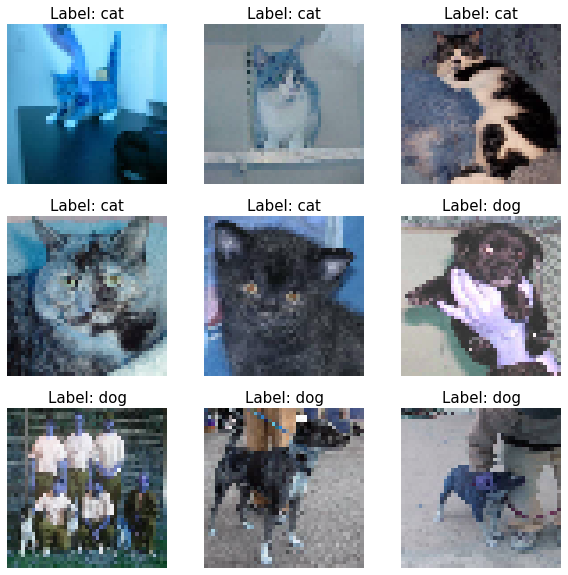

In [53]:
fig, axes = plt.subplots(3, 3, figsize = (10,10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(data.values.reshape((data.shape[0], 45, 45, 3))[i*2550], cmap=plt.get_cmap('gray'))
    axes[i].set_title("Label: " + str(df.label[i*2550]), size=15)
    axes[i].axis('off')
plt.show()

Some cv2 methods which I tried to use for better results, but nothing of them improved the model:

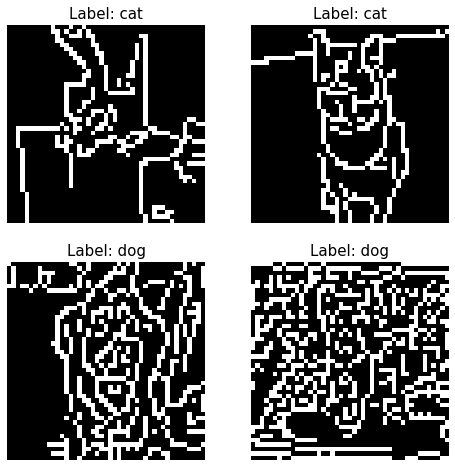

In [57]:
fig, axes = plt.subplots(2, 2, figsize = (8,8))
axes = axes.ravel()

for i in range(4):
    img = data.values.reshape((data.shape[0], 45, 45, 3))[i*7500];
    edges = cv2.Canny(img, threshold1 = 100, threshold2 = 200)
    img = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img, cmap=plt.get_cmap('gray'))
    axes[i].set_title("Label: " + df.label[i*7500], size=15)
    axes[i].axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


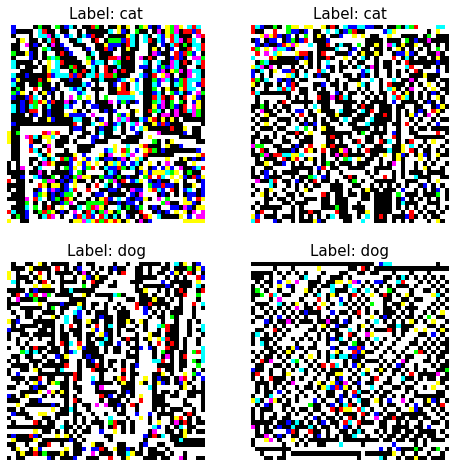

In [58]:
fig, axes = plt.subplots(2, 2, figsize = (8,8))
axes = axes.ravel()

for i in range(4):
    img = data.values.reshape((data.shape[0], 45, 45, 3))[i*7500];
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    img = cv2.cvtColor(laplacian.astype('float32'), cv2.COLOR_RGB2BGR)
    axes[i].imshow(img, cmap=plt.get_cmap('gray'))
    axes[i].set_title("Label: " + df.label[i*7500], size=15)
    axes[i].axis('off')
plt.show();

Let's continue to deal with the data:

In [59]:
mapping = {'cat':0, 'dog':1}
df.label = df.label.map(mapping)
df.sample(2, random_state=555)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
24181      0       0      20      98       0      21      99       1      35   
36919      1      58      73      79      76      83      92      92      99   

       pixel9  ...  pixel6066  pixel6067  pixel6068  pixel6069  pixel6070  \
24181     126  ...         83         38         64         80         36   
36919     109  ...        110        101         98         90        111   

       pixel6071  pixel6072  pixel6073  pixel6074  pixel6075  
24181         59         74         34         64         75  
36919        104        109        101        100        100  

[2 rows x 6076 columns]

In [60]:
# A function to show the labels when we want it
def num_to_name(label):
    labeled = label.copy()
    mapping = {0 :'Cat',
    1 :'Dog'}
    labeled = label.map(mapping)
    return labeled

In [61]:
df.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  46000.000000  46000.000000  46000.000000  46000.000000  46000.000000   
mean       0.500000    105.776957    113.879652    118.374109    106.321674   
std        0.500005     72.222756     70.735095     71.035327     71.973537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     45.000000     54.000000     59.000000     45.000000   
50%        0.500000     95.000000    108.000000    114.000000     96.000000   
75%        1.000000    158.000000    166.000000    172.000000    158.000000   
max        1.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  46000.000000  46000.000000  46000.000000  46000.000000  46000.000000   
mean     114.559326    119.161630    106.896152    115.332370    120.020174   
std       70.451306     70.791182     71.616338     70.082139     70.439963   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       55.000000     60.000000     46.000000     56.000000     62.000000   
50%      109.000000    115.000000     97.000000    111.000000    117.000000   
75%      167.000000    173.000000    159.000000    167.000000    174.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...     pixel6066     pixel6067     pixel6068    pixel6069  \
count  ...  46000.000000  46000.000000  46000.000000  46000.00000   
mean   ...    128.976739    112.653565    121.137543    127.71387   
std    ...     67.978541     68.627585     66.727919     68.20896   
min    ...      0.000000      0.000000      0.000000      0.00000   
25%    ...     75.000000     56.000000     68.000000     74.00000   
50%    ...    129.000000    107.000000    120.000000    128.00000   
75%    ...    181.000000    163.000000    170.000000    179.00000   
max    ...    255.000000    255.000000    255.000000    255.00000   

          pixel6070     pixel6071     pixel6072     pixel6073     pixel6074  \
count  46000.000000  46000.000000  46000.000000  46000.000000  46000.000000   
mean     111.666000    120.017870    126.457500    110.787630    118.997478   
std       68.787798     66.953883     68.465039     69.151159     67.333191   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       55.000000     67.000000     72.000000     54.000000     65.000000   
50%      106.000000    118.000000    126.000000    104.000000    117.000000   
75%      161.000000    169.000000    178.000000    160.000000    168.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel6075  
count  46000.000000  
mean     125.240674  
std       68.774698  
min        0.000000  
25%       70.000000  
50%      124.000000  
75%      177.000000  
max      255.000000  

[8 rows x 6076 columns]

In [62]:
df[df['label']==0].describe() # for cats

label        pixel1        pixel2        pixel3        pixel4  \
count  23000.0  23000.000000  23000.000000  23000.000000  23000.000000   
mean       0.0    103.017130    109.829348    116.110043    103.701739   
std        0.0     72.297679     71.143112     71.452112     72.251220   
min        0.0      0.000000      0.000000      0.000000      0.000000   
25%        0.0     41.000000     49.000000     55.000000     42.000000   
50%        0.0     92.000000    103.000000    112.000000     93.000000   
75%        0.0    155.000000    162.000000    170.000000    156.000000   
max        0.0    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  23000.000000  23000.000000  23000.000000  23000.000000  23000.000000   
mean     110.649261    117.074304    104.445609    111.618130    118.138043   
std       71.033367     71.415441     71.930307     70.684899     71.076800   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       50.000000     56.000000     43.000000     52.000000     58.000000   
50%      104.000000    113.000000     95.000000    106.000000    115.000000   
75%      163.000000    171.000000    157.000000    165.000000    172.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...     pixel6066     pixel6067     pixel6068     pixel6069  \
count  ...  23000.000000  23000.000000  23000.000000  23000.000000   
mean   ...    129.806217    113.948261    119.475826    128.096739   
std    ...     70.888013     71.223152     69.846556     71.128635   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     72.000000     53.000000     61.000000     70.000000   
50%    ...    132.000000    109.000000    118.000000    130.000000   
75%    ...    186.000000    168.000000    172.000000    184.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

          pixel6070     pixel6071     pixel6072     pixel6073     pixel6074  \
count  23000.000000  23000.000000  23000.000000  23000.000000  23000.000000   
mean     112.513435    117.864174    126.306783    111.357391    116.553913   
std       71.350114     70.052935     71.406110     71.561842     70.165558   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       52.000000     59.000000     67.000000     50.750000     58.000000   
50%      107.000000    115.000000    127.000000    105.000000    113.000000   
75%      166.000000    171.000000    182.000000    165.000000    169.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel6075  
count  23000.000000  
mean     124.790652  
std       71.444007  
min        0.000000  
25%       65.000000  
50%      125.000000  
75%      180.000000  
max      255.000000  

[8 rows x 6076 columns]

In [63]:
df[df['label']==1].describe() # for dogs

label        pixel1        pixel2        pixel3        pixel4  \
count  23000.0  23000.000000  23000.000000  23000.000000  23000.000000   
mean       1.0    108.536783    117.929957    120.638174    108.941609   
std        0.0     72.043677     70.092589     70.545007     71.600543   
min        1.0      0.000000      0.000000      0.000000      0.000000   
25%        1.0     48.000000     60.000000     63.000000     49.000000   
50%        1.0     99.000000    114.000000    117.000000     99.000000   
75%        1.0    160.000000    170.000000    174.000000    160.000000   
max        1.0    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  23000.000000  23000.000000  23000.000000  23000.000000  23000.000000   
mean     118.469391    121.248957    109.346696    119.046609    121.902304   
std       69.646759     70.100795     71.218275     69.276826     69.748088   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       61.000000     64.000000     50.000000     62.000000     65.000000   
50%      115.000000    118.000000    100.000000    116.000000    119.000000   
75%      170.000000    174.000000    161.000000    170.000000    175.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...     pixel6066     pixel6067     pixel6068     pixel6069  \
count  ...  23000.000000  23000.000000  23000.000000  23000.000000   
mean   ...    128.147261    111.358870    122.799261    127.331000   
std    ...     64.929797     65.906036     63.414192     65.157891   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     78.000000     58.000000     74.750000     77.000000   
50%    ...    127.000000    105.000000    121.000000    126.000000   
75%    ...    175.000000    157.000000    167.000000    174.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

          pixel6070     pixel6071     pixel6072     pixel6073     pixel6074  \
count  23000.000000  23000.000000  23000.000000  23000.000000  23000.000000   
mean     110.818565    122.171565    126.608217    110.217870    121.441043   
std       66.116965     63.632924     65.393035     66.650033     64.285039   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       58.000000     73.000000     76.000000     57.000000     73.000000   
50%      104.000000    120.000000    125.000000    103.000000    119.000000   
75%      157.000000    167.000000    174.000000    156.000000    166.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel6075  
count  23000.000000  
mean     125.690696  
std       65.996005  
min        0.000000  
25%       75.000000  
50%      124.000000  
75%      174.000000  
max      255.000000  

[8 rows x 6076 columns]

In [21]:
df.isnull().sum().sum() # the dataset has no NaN values

0

In [64]:
target = df['label'] # the feature we would like to predict, the label of picture
data = df.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

In [65]:
num_to_name(target).value_counts()

Dog    23000
Cat    23000
Name: label, dtype: int64

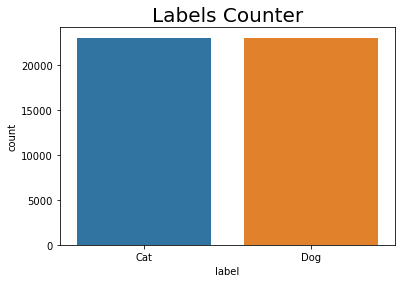

In [66]:
plt.subplots(figsize = (6,4))
plt.title("Labels Counter", size=20)
fig = sns.countplot(num_to_name(target))

## Data Processing

### Training / Testing Split:

In [67]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.15, random_state=18)
# we have X_test too

### Scaling:

In [68]:
# Costdown - to avoid ininity cases with high numbers

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

##### Since we have 256 pixels (0-255), we can divide them into 255 in order to achieve the desired range values (0-1).

In [69]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

##### We would like to find out optimal n_components value

In [70]:
pca = PCA() # all 6075 features
pca.fit(X_train)

PCA()

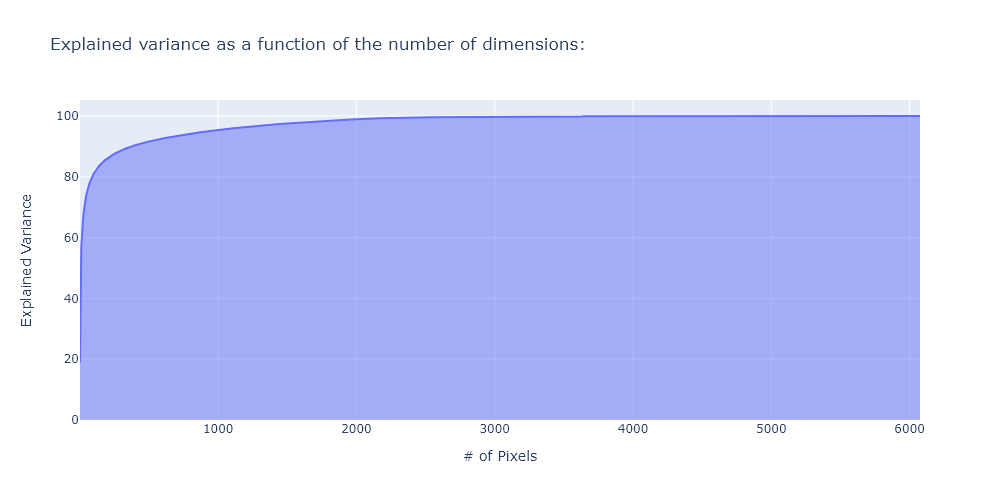

In [71]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Pixels", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

fig.show("png")

In [72]:
pca = PCA(n_components=0.95) # we can try using svd_solver="randomized"
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
pca.n_components_

930

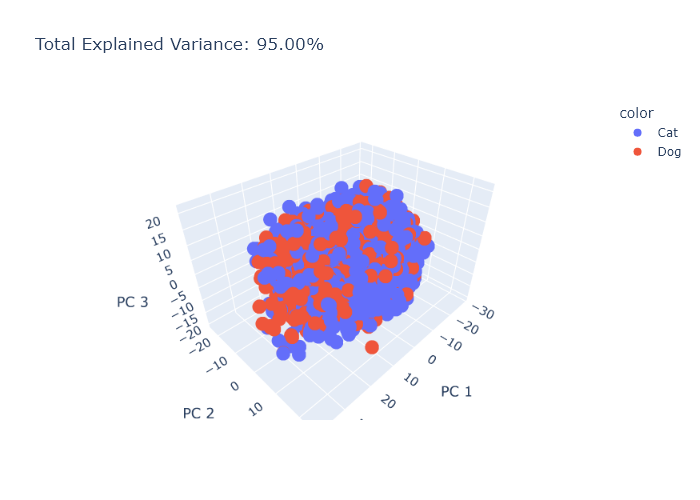

In [73]:
# A three-dimensional graph depicting the way our data is interpreted, plotly does it easily for us 
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_train_reduced, x=0, y=1, z=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show("png")

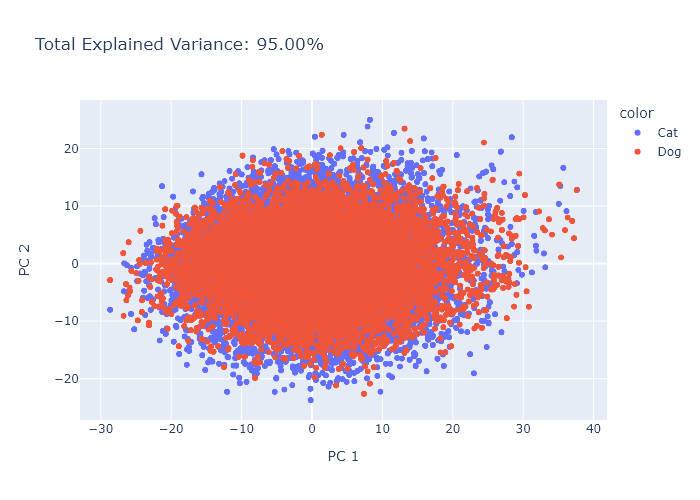

In [74]:
# 2D version: with x and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=0, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

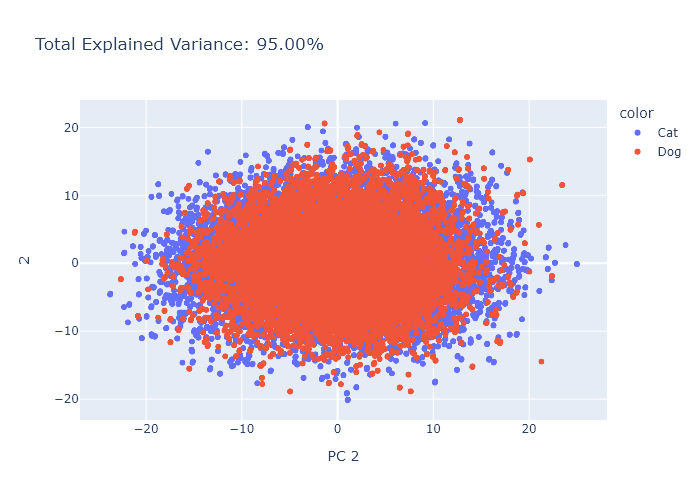

In [75]:
# 2D version: with y and z
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=1, y=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")


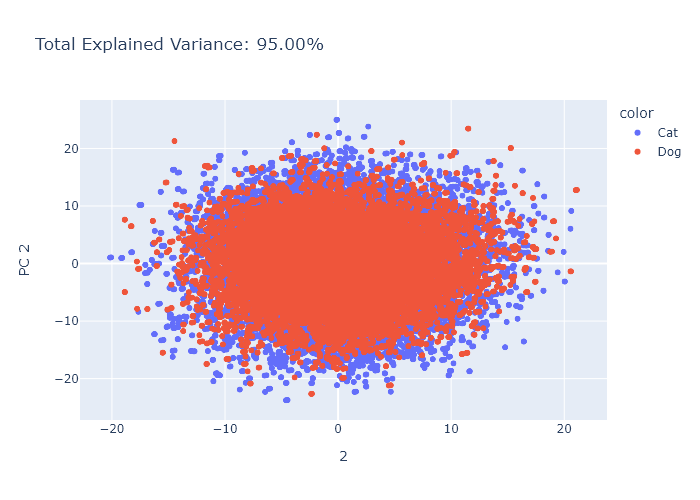

In [76]:
# 2D version: with z and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=2, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

##### After reducing the num of the features, we will convert X_train & X_validation to pandas data frames:

In [77]:
X_train = pd.DataFrame(X_train_reduced)
X_val = pd.DataFrame(X_val_reduced)

# Models

## Naive Bayes

In [78]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes

GaussianNB()

In [79]:
y_pred = bayes.predict(X_val)
bayes_acc = accuracy_score(y_val, y_pred)
bayes_acc

0.5842028985507246

In [80]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.63      3453
           1       0.61      0.47      0.53      3447

    accuracy                           0.58      6900
   macro avg       0.59      0.58      0.58      6900
weighted avg       0.59      0.58      0.58      6900



### KNN

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(X_val)
knn_acc = accuracy_score(y_val, y_pred)
knn_acc

0.5957971014492753

In [83]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      3453
           1       0.63      0.46      0.53      3447

    accuracy                           0.60      6900
   macro avg       0.60      0.60      0.59      6900
weighted avg       0.60      0.60      0.59      6900



### Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr

LogisticRegression()

In [85]:
y_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, y_pred)
lr_acc

0.61

In [86]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      3453
           1       0.61      0.60      0.60      3447

    accuracy                           0.61      6900
   macro avg       0.61      0.61      0.61      6900
weighted avg       0.61      0.61      0.61      6900



### CatBoost

In [87]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
cat

In [88]:
y_pred = cat.predict(X_val)
y_pred_cat = y_pred.copy()
cat_acc = accuracy_score(y_val, y_pred)
cat_acc

0.7220289855072464

In [89]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3453
           1       0.73      0.71      0.72      3447

    accuracy                           0.72      6900
   macro avg       0.72      0.72      0.72      6900
weighted avg       0.72      0.72      0.72      6900



### AdaBoost

In [90]:
rfc = RandomForestClassifier(n_estimators=10)
ada = AdaBoostClassifier(n_estimators=100,learning_rate= 0.1, base_estimator=rfc)
ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                   learning_rate=0.1, n_estimators=100)

In [91]:
y_pred = ada.predict(X_val)
ada_acc = accuracy_score(y_val, y_pred)
ada_acc

0.508840579710145

In [92]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58      3453
           1       0.51      0.33      0.40      3447

    accuracy                           0.51      6900
   macro avg       0.51      0.51      0.49      6900
weighted avg       0.51      0.51      0.49      6900



### Gradient Boosting

In [93]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb

GradientBoostingClassifier()

In [94]:
y_pred = gb.predict(X_val)
gb_acc = accuracy_score(y_val, y_pred)
gb_acc

0.6660869565217391

In [95]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      3453
           1       0.67      0.65      0.66      3447

    accuracy                           0.67      6900
   macro avg       0.67      0.67      0.67      6900
weighted avg       0.67      0.67      0.67      6900



### XGBoost

In [96]:
xgb = XGBClassifier(use_label_encoder =False)
xgb.fit(X_train, y_train)
xgb

[18:06:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [97]:
y_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred)
xgb_acc

0.6866666666666666

In [98]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3453
           1       0.69      0.68      0.69      3447

    accuracy                           0.69      6900
   macro avg       0.69      0.69      0.69      6900
weighted avg       0.69      0.69      0.69      6900



### Random Forest

In [99]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf

RandomForestClassifier()

In [100]:
y_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, y_pred)
rf_acc

0.6220289855072464

In [101]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3453
           1       0.62      0.64      0.63      3447

    accuracy                           0.62      6900
   macro avg       0.62      0.62      0.62      6900
weighted avg       0.62      0.62      0.62      6900



### Stacking

In [ ]:
stacking = StackingClassifier(estimators=[('gxb',xgb),('rf',rf)],final_estimator=cat)
stacking.fit(X_train,y_train)
stacking

[18:14:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
y_pred = stacking.predict(X_val)
stacking_acc = accuracy_score(y_val, y_pred)
stacking_acc

In [ ]:
print (classification_report(y_val, y_pred))

### Soft Voting

In [ ]:
clf1 = xgb
clf2 = cat
clf3 = rf

In [ ]:
sv = VotingClassifier(estimators=[
        ('xgb', clf1), ('cat', clf2)], voting='soft') # , ('rf', clf3)
sv.fit(X_train, y_train)
sv

In [ ]:
y_pred = sv.predict(X_val)
sv_acc = accuracy_score(y_val, y_pred)
sv_acc

In [ ]:
print (classification_report(y_val, y_pred))

We can see that voting model didn't improve our model. It can be explained by the fact that xgb and catboost are both gradinet boosting alogrithms. In that case, their strategy is a little bit the same. In this case, catboost did better job, so we don't need xgb.

In [ ]:
acc_list = {'Model':  ['Naive Bayes', 'KNN','Logistic Regression','CatBoost', 'AdaBoost', 'Gradient Boosting', 'XGBoost','Random Forest','Stacking', 'Soft Voting'],
        'Accuracy': [bayes_acc,knn_acc,lr_acc,cat_acc,ada_acc,gb_acc,xgb_acc,rf_acc,stacking_acc,sv_acc],
        }

In [ ]:
# bar graph as a conclusion to the models
fig = go.Figure(data=[
    go.Bar(name='train set', x=acc_list['Model'], y=acc_list['Accuracy'],text=np.round(acc_list['Accuracy'],2),textposition='outside',marker_color='lightsalmon'),
])
fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show("png")

As we can see, CatBoost has the best results with 72 % of success

In [ ]:
# we would like to present confusion matrix for our best model:

cm = confusion_matrix(y_val, y_pred_cat)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.coolwarm)
plt.title('Confusion matrix - CatBoost Classifier', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Cat','Dog'], rotation=45, size = 12)
plt.yticks(tick_marks, ['Cat','Dog'], size = 12)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## Cross Validation

In [70]:
# we will concat our X,y train & validation for cross validation on our best model - catboost

X = pd.concat([X_train, X_val], axis = 0)
y = pd.concat([y_train, y_val], axis = 0)

# now the dataset is united again, we can split it 5 time for cv score

cv_score = cross_val_score(cat, X=X, y=y, cv=5)
cv_score

array([0.7173, 0.7154, 0.7134, 0.726 , 0.7185])

As you can see, the cross validation gives us amazing results, I'm afraid that it because of overfitting. Which happens because of the fact that each picture is doubled.

# Test